<a href="https://colab.research.google.com/github/cardonasebastian/MNA_PROYECTO/blob/main/Avance2/FE_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTITUTO TECNOLÓGICO DE ESTUDIOS SUPERIORES DE MONTERREY

# Maestría en Inteligencia Artificial Aplicada

# TC5035.10 Proyecto Integrador:

# Optimización Estratégica de la Seguridad Vial: Implementación de un Modelo de Clasificación Avanzado para la Evaluación y Mejora de Hábitos de Conducción


#Fase 2.
# Avance 2. Ingeniería de características.

#A01687530 - Fernando Sebastian Sanchez Cardona
#A01793670 - Bryan Alvarado Cruz
# A01793832 - Fernando Anaya Delgado

# 1. Contruccion.

Para este apartado tenemos 5 fuentes de datos muy importantes:

*   **Consumo de combustible**
*   **Tracking de Viaje**
*   **Tiempo en espera del camion**
*   **Seguridad del camion**


Nuestro objectivo para cada fuente de datos es distinto en el caso de
*   **Consumo de combustible**: La caracteristica de las variables es el consumo de disel de los viaje que realizo el camion

*   **Tracking de Viaje**: La caracteristica de las variables es la distancia en km que recorrio de los viajes que realizo el camion.

  Una nueva caractetistica es poder sacar las siguientes variables.
  **distancia**	, **disel consumido**	, **rendimiento**	,**consumo**	y la **fecha**

  con los datos ya obtenidos podemos sacar los datos ya mencionados como **distancia/disel consumido** y **disel consumido/distancia** que seria el **rendimiento** y **consumo**



*   **Tiempo en espera del camion**: La caracteristicas de las variables es saber cuanto tiempo estuvo parado el camion es decir tenemos que realizar el calculo sobre todo el viaje del camion cuando fueron los puntos maximos para poder detectar cuando estuvo parado mas tiempo.
*   **Seguridad del camion**: La caracteristicas de las variables es saber si utilizan las metricas de seguridad de los camiones asi como su manejo de la unidad es decir , distancia , si se puso el cinturon , giro bruscos , etc.




# 2 Normalizacion

Este este apartado vamos a realizar las transformaciones de los datos crudos que se recuperar en el EDA. Esta Arquitectura de datos lleva 3 fases las cuales son las siguientes extraer datos crudos (Capa RAW) , Transformaciones y limpieza de los datos (Capa Silver), Enriqueser las multiples tablas (Capa Gold). Como se muestra en la siguiente figura.

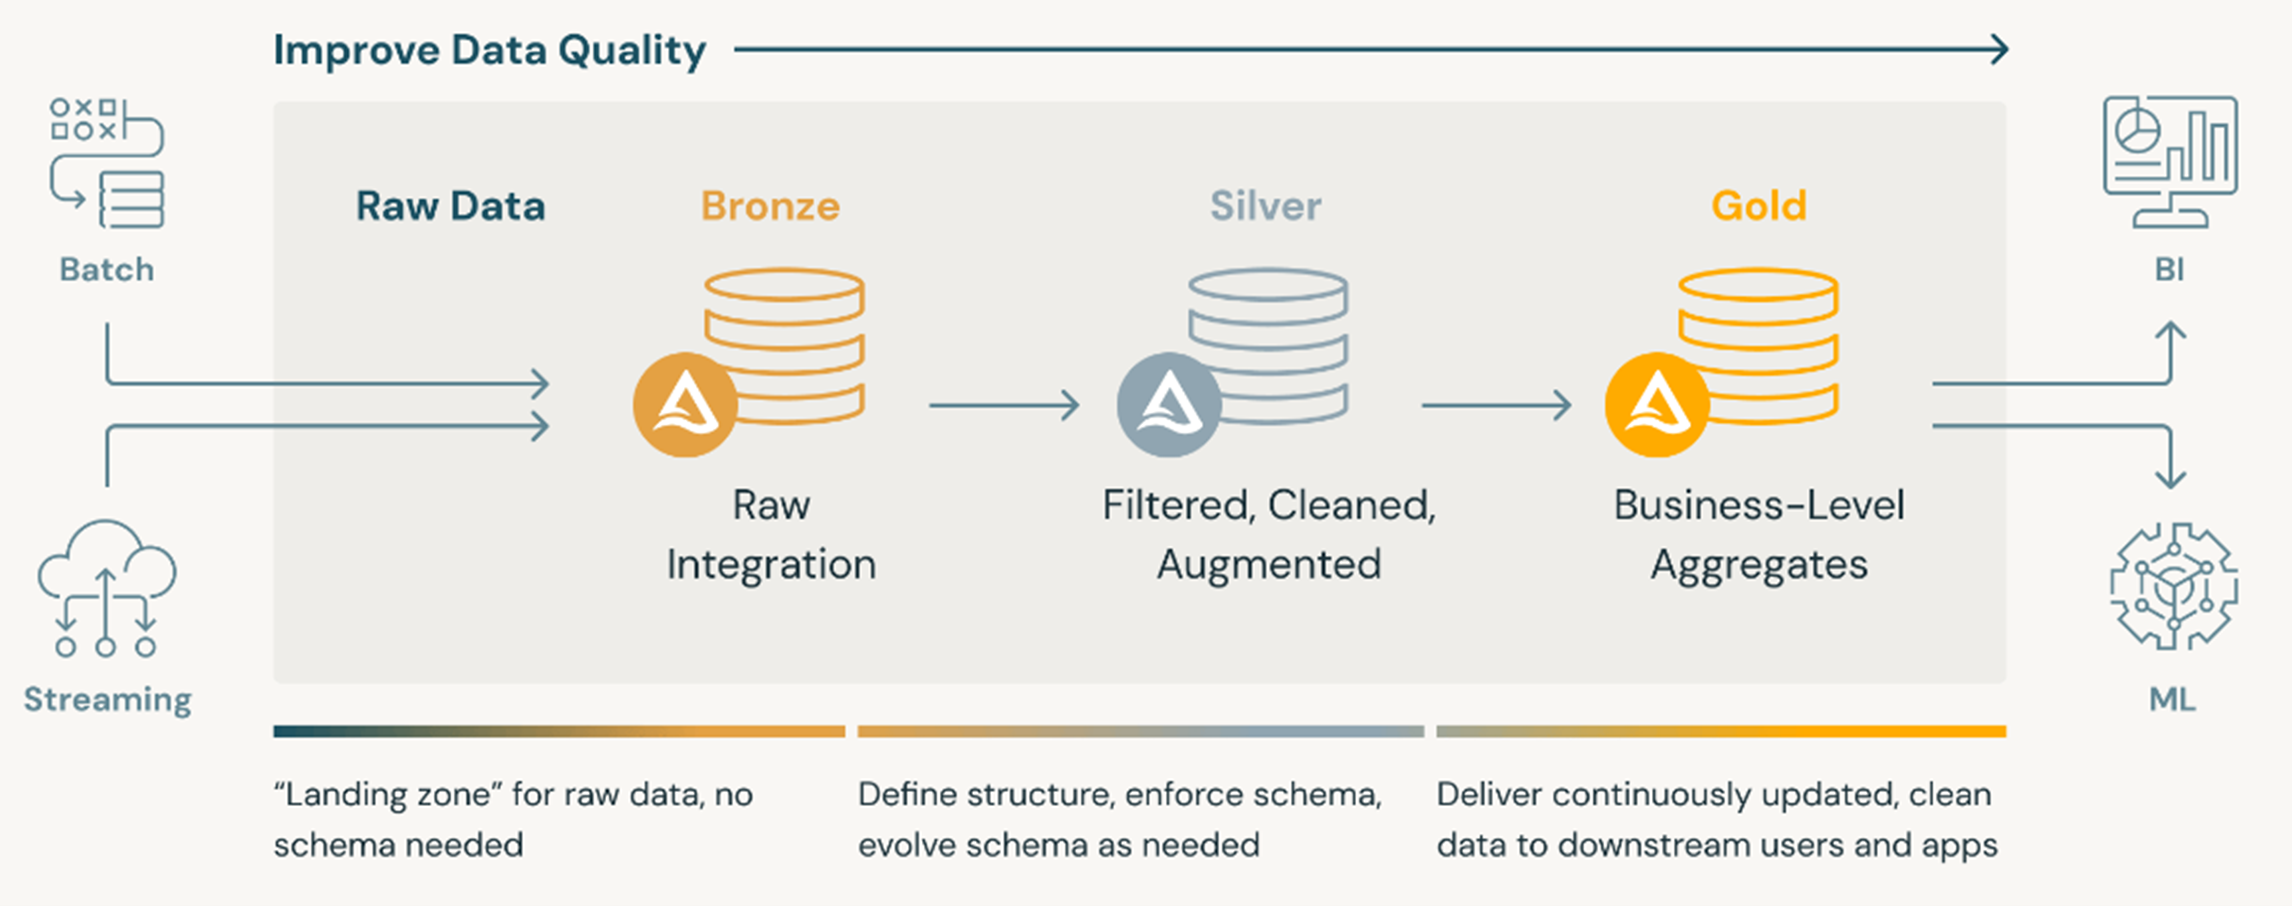

# 3. Tranformacion

## Consumo

### Leer datos del consumo del camion

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import pandas as pd
file_path = '/content/drive/My Drive/MNA_PI/consumo_raw.csv'
df_consumo = pd.read_csv(file_path)
df_consumo

,device,totalFuelUsed,dateTime,confidence,version,id,date
0,{'id': 'b27'},0.295593,2024-05-26T23:46:48.000Z,NaN,0000000000954fff,aw0EjRmPybE2nUiCkH0atSA,2024-05-27
1,{'id': 'b27'},2.388364,2024-05-26T16:26:48.000Z,NaN,0000000000954ff3,abwDWBQnFuUGD8ycHsxSiwA,2024-05-27
2,{'id': 'b27'},0.247184,2024-05-26T16:16:11.000Z,NaN,0000000000954d03,aphQS3HYvSUu7iFB5xjNATg,2024-05-27
3,{'id': 'b27'},0.250702,2024-05-26T06:49:57.000Z,NaN,0000000000954cf2,aETdr_3l6fUa8MqcBH09NkQ,2024-05-27
4,{'id': 'b27'},1.194848,2024-05-26T02:43:21.000Z,NaN,00000000009549f4,aO7UE_aA-5UWzayp0VnYD7w,2024-05-27
...,...,...,...,...,...,...,...
2127,{'id': 'b12E'},12.772535,2024-05-26T10:37:31.000Z,NaN,0000000000954ad0,aMc3opKSmP0e0sK9OtHjDFA,2024-05-27
2128,{'id': 'b12E'},0.026770,2024-05-26T09:48:37.000Z,NaN,0000000000954ab5,aouts8T230USsSmFADBqIHA,2024-05-27
2129,{'id': 'b12E'},0.908329,2024-05-26T03:15:22.000Z,NaN,0000000000954ab2,aiSblrr_QAkWiiM_scGlwig,2024-05-27
2130,{'id': 'b12E'},0.200552,2024-05-26T03:06:29.000Z,NaN,00000000009548cb,a1GgjwKaqR0Cmowb2W2Vk2A,2024-05-27


### Leer datos del catalogo de los camiones activos

In [4]:
import pandas as pd
file_path = '/content/drive/My Drive/MNA_PI/catalog_driver.csv'
df_catalog = pd.read_csv(file_path)
df_catalog

,driver_id,name,id,firstName,lastName,complete_name
0,No Asignado,1,b74,No Asignado,No Asignado,No Asignado
1,No Asignado,2021,b27,No Asignado,No Asignado,No Asignado
2,No Asignado,2022,b28,No Asignado,No Asignado,No Asignado
3,No Asignado,2023,b29,No Asignado,No Asignado,No Asignado
4,b2F9,2024,b2A,RAUL BARUK,CARBALLO,RAUL BARUK CARBALLO
...,...,...,...,...,...,...
150,No Asignado,2212,b114,No Asignado,No Asignado,No Asignado
151,No Asignado,2213,b110,No Asignado,No Asignado,No Asignado
152,No Asignado,2214,b10F,No Asignado,No Asignado,No Asignado
153,No Asignado,2215,b111,No Asignado,No Asignado,No Asignado


In [ ]:
import ast
# Función para tranformar el objeto device en un Id
def tranformacion_json(cadena_json):
    try:
        return ast.literal_eval(cadena_json).get('id')
    except (ValueError, SyntaxError):
        return None

In [34]:


# Aplicar la función a la columna 'device' y renombrar la columna a 'device_id'
df_consumo['device_id'] = df_consumo['device'].apply(tranformacion_json)

# Eliminar la columna original 'device'
df_consumo.drop('device', axis=1, inplace=True)


### Se realiza un join con los datos del catalogo y consumo para saber la distancia total

In [39]:
# Realizar la unión con `catalog_devices`
merged_df = df_consumo.merge(df_catalog, left_on='device_id', right_on='id')

# Agrupar por 'name' y 'date', y sumar 'totalFuelUsed'
grouped_df = merged_df.groupby(['name', 'date']).agg(total_fuel_used_sum=('totalFuelUsed', 'sum')).reset_index()
# Ordenar por 'date'
result_df = grouped_df.sort_values(by='date')


result_df

,name,date,total_fuel_used_sum
0,2021,2024-05-27,22.912210
82,2136,2024-05-27,244.990736
81,2135,2024-05-27,12.220765
80,2133,2024-05-27,166.089771
79,2132,2024-05-27,266.749984
...,...,...,...
32,2071,2024-05-27,263.477829
31,2068,2024-05-27,242.507211
30,2067,2024-05-27,101.206947
28,2065,2024-05-27,405.177182


### Comparar camiones activos

In [43]:
# Realizar un left join con el catálogo para asegurarse de que todos los dispositivos están presentes
final_df = df_catalog.merge(result_df, on='name', how='left')

# Rellenar los valores faltantes con 0 para 'total_fuel_used_sum' y con la fecha actual para 'date'
final_df['total_fuel_used_sum'] = final_df['total_fuel_used_sum'].fillna(0)

# Seleccionar columnas específicas
final_df = final_df[['name', 'total_fuel_used_sum']]

final_df

,name,total_fuel_used_sum
0,1,0.000000
1,2021,22.912210
2,2022,3.684863
3,2023,0.000000
4,2024,0.000000
...,...,...
150,2212,249.618984
151,2213,0.000000
152,2214,202.042614
153,2215,222.850052


## Viaje

In [44]:
import pandas as pd
file_path = '/content/drive/My Drive/MNA_PI/trip_raw.csv'
df_trip = pd.read_csv(file_path)
df_trip

,afterHoursDistance,afterHoursDrivingDuration,afterHoursEnd,afterHoursStart,afterHoursStopDuration,averageSpeed,distance,drivingDuration,engineHours,idlingDuration,...,stop,stopDuration,stopPoint,workDistance,workDrivingDuration,workStopDuration,device,driver,id,date
0,0.000139,00:00:01,True,True,00:19:11,0.500000,0.000139,00:00:01,2.914200e+06,00:07:50,...,2024-05-26T00:00:28.000Z,00:19:11,"{'x': -100.25431060791016, 'y': 20.57674217224...",0,00:00:00,00:00:00,{'id': 'bF9'},UnknownDriverId,b51BDC76,2024-05-27
1,0.082976,00:01:26.9370000,True,True,00:25:24.0630000,3.435972,0.082976,00:01:26.9370000,1.352844e+07,00:00:04,...,2024-05-26T00:01:19.000Z,00:25:24.0630000,"{'x': -100.25428771972656, 'y': 25.87064361572...",0,00:00:00,00:00:00,{'id': 'bA5'},"{'id': 'b95', 'isDriver': True}",b51BE450,2024-05-27
2,0.016534,00:00:23,True,True,00:00:39.0630000,2.587896,0.016534,00:00:23,2.105462e+06,00:00:21,...,2024-05-26T00:02:19.000Z,00:00:39.0630000,"{'x': -99.5672836303711, 'y': 27.46670150756836}",0,00:00:00,00:00:00,{'id': 'b10F'},UnknownDriverId,b51BD0F2,2024-05-27
3,177.590710,02:23:47.9370000,True,True,00:22:11,74.099590,177.590710,02:23:47.9370000,7.681680e+06,00:14:08,...,2024-05-26T00:02:21.000Z,00:22:11,"{'x': -100.2546157836914, 'y': 25.871002197265...",0,00:00:00,00:00:00,{'id': 'bC4'},UnknownDriverId,b51BE03F,2024-05-27
4,0.106728,00:01:18.9370000,True,True,00:14:46.0630000,4.867437,0.106728,00:01:18.9370000,1.480968e+07,00:00:05,...,2024-05-26T00:02:26.000Z,00:14:46.0630000,"{'x': -100.25487518310547, 'y': 25.87102699279...",0,00:00:00,00:00:00,{'id': 'b71'},"{'id': 'bBD', 'isDriver': True}",b51BD9BC,2024-05-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,0.053203,00:02:27,True,True,00:06:50,1.302942,0.053203,00:02:27,1.413172e+07,00:06:50,...,2024-05-26T23:57:44.000Z,00:06:50,"{'x': -100.25444030761719, 'y': 20.57722854614...",0,00:00:00,00:00:00,{'id': 'bBF'},"{'id': 'b24B', 'isDriver': True}",b51EFF57,2024-05-27
2164,1.811011,00:06:29,True,True,00:06:47,16.759995,1.811011,00:06:29,5.813981e+06,00:06:47,...,2024-05-26T23:59:34.000Z,00:06:47,"{'x': -99.56751251220703, 'y': 27.46631622314453}",0,00:00:00,00:00:00,{'id': 'bEF'},"{'id': 'bE3', 'isDriver': True}",b51F005A,2024-05-27
2165,133.623320,02:00:06.9370000,True,True,00:08:54.0630000,66.747350,133.623320,02:00:06.9370000,7.360920e+06,00:00:08,...,2024-05-26T23:59:34.000Z,00:08:54.0630000,"{'x': -100.72309875488281, 'y': 25.16887092590...",0,00:00:00,00:00:00,{'id': 'bC5'},UnknownDriverId,b51F0251,2024-05-27
2166,202.349120,02:43:13.9370000,True,True,00:06:05,74.378350,202.349120,02:43:13.9370000,9.666799e+06,00:06:05,...,2024-05-26T23:59:41.000Z,00:06:05,"{'x': -100.25466918945312, 'y': 25.87100219726...",0,00:00:00,00:00:00,{'id': 'b9D'},UnknownDriverId,b51F00C4,2024-05-27


### Normalizacion de Device

In [45]:
# Aplicar la función a la columna 'device' y renombrar la columna a 'device_id'
df_trip['device_id'] = df_trip['device'].apply(tranformacion_json)

# Eliminar la columna original 'device'
df_trip.drop('device', axis=1, inplace=True)

df_trip

,afterHoursDistance,afterHoursDrivingDuration,afterHoursEnd,afterHoursStart,afterHoursStopDuration,averageSpeed,distance,drivingDuration,engineHours,idlingDuration,...,stop,stopDuration,stopPoint,workDistance,workDrivingDuration,workStopDuration,driver,id,date,device_id
0,0.000139,00:00:01,True,True,00:19:11,0.500000,0.000139,00:00:01,2.914200e+06,00:07:50,...,2024-05-26T00:00:28.000Z,00:19:11,"{'x': -100.25431060791016, 'y': 20.57674217224...",0,00:00:00,00:00:00,UnknownDriverId,b51BDC76,2024-05-27,bF9
1,0.082976,00:01:26.9370000,True,True,00:25:24.0630000,3.435972,0.082976,00:01:26.9370000,1.352844e+07,00:00:04,...,2024-05-26T00:01:19.000Z,00:25:24.0630000,"{'x': -100.25428771972656, 'y': 25.87064361572...",0,00:00:00,00:00:00,"{'id': 'b95', 'isDriver': True}",b51BE450,2024-05-27,bA5
2,0.016534,00:00:23,True,True,00:00:39.0630000,2.587896,0.016534,00:00:23,2.105462e+06,00:00:21,...,2024-05-26T00:02:19.000Z,00:00:39.0630000,"{'x': -99.5672836303711, 'y': 27.46670150756836}",0,00:00:00,00:00:00,UnknownDriverId,b51BD0F2,2024-05-27,b10F
3,177.590710,02:23:47.9370000,True,True,00:22:11,74.099590,177.590710,02:23:47.9370000,7.681680e+06,00:14:08,...,2024-05-26T00:02:21.000Z,00:22:11,"{'x': -100.2546157836914, 'y': 25.871002197265...",0,00:00:00,00:00:00,UnknownDriverId,b51BE03F,2024-05-27,bC4
4,0.106728,00:01:18.9370000,True,True,00:14:46.0630000,4.867437,0.106728,00:01:18.9370000,1.480968e+07,00:00:05,...,2024-05-26T00:02:26.000Z,00:14:46.0630000,"{'x': -100.25487518310547, 'y': 25.87102699279...",0,00:00:00,00:00:00,"{'id': 'bBD', 'isDriver': True}",b51BD9BC,2024-05-27,b71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,0.053203,00:02:27,True,True,00:06:50,1.302942,0.053203,00:02:27,1.413172e+07,00:06:50,...,2024-05-26T23:57:44.000Z,00:06:50,"{'x': -100.25444030761719, 'y': 20.57722854614...",0,00:00:00,00:00:00,"{'id': 'b24B', 'isDriver': True}",b51EFF57,2024-05-27,bBF
2164,1.811011,00:06:29,True,True,00:06:47,16.759995,1.811011,00:06:29,5.813981e+06,00:06:47,...,2024-05-26T23:59:34.000Z,00:06:47,"{'x': -99.56751251220703, 'y': 27.46631622314453}",0,00:00:00,00:00:00,"{'id': 'bE3', 'isDriver': True}",b51F005A,2024-05-27,bEF
2165,133.623320,02:00:06.9370000,True,True,00:08:54.0630000,66.747350,133.623320,02:00:06.9370000,7.360920e+06,00:00:08,...,2024-05-26T23:59:34.000Z,00:08:54.0630000,"{'x': -100.72309875488281, 'y': 25.16887092590...",0,00:00:00,00:00:00,UnknownDriverId,b51F0251,2024-05-27,bC5
2166,202.349120,02:43:13.9370000,True,True,00:06:05,74.378350,202.349120,02:43:13.9370000,9.666799e+06,00:06:05,...,2024-05-26T23:59:41.000Z,00:06:05,"{'x': -100.25466918945312, 'y': 25.87100219726...",0,00:00:00,00:00:00,UnknownDriverId,b51F00C4,2024-05-27,b9D


In [50]:
merged_df_trip = df_trip.merge(df_catalog, left_on='device_id', right_on='id')

# Agrupar por 'name' y 'date', y sumar 'totalFuelUsed'
grouped_df_trip = merged_df_trip.groupby(['name', 'date']).agg(total_distance=('distance', 'sum')).reset_index()
# Ordenar por 'date'
result_df_trip = grouped_df_trip.sort_values(by='date')

result_df_trip

,name,date,total_distance
0,2021,2024-05-27,58.823929
82,2136,2024-05-27,793.750783
81,2135,2024-05-27,0.049966
80,2133,2024-05-27,449.199327
79,2132,2024-05-27,1010.587972
...,...,...,...
32,2071,2024-05-27,911.859801
31,2068,2024-05-27,792.644625
30,2067,2024-05-27,306.140662
28,2065,2024-05-27,1273.547357


### Camparar Camiones activos de Viaje

In [52]:
# Realizar un left join con el catálogo para asegurarse de que todos los dispositivos están presentes
final_df_trip = df_catalog.merge(result_df_trip, on='name', how='left')

# Rellenar los valores faltantes con 0 para 'total_fuel_used_sum' y con la fecha actual para 'date'
final_df_trip['total_distance'] = final_df_trip['total_distance'].fillna(0)

# Seleccionar columnas específicas
final_df_trip = final_df_trip[['name', 'total_distance']]

final_df_trip

,name,total_distance
0,1,0.000000
1,2021,58.823929
2,2022,2.495523
3,2023,0.000000
4,2024,0.000000
...,...,...
150,2212,829.072007
151,2213,0.000000
152,2214,447.290408
153,2215,807.527799


## Tiempo inactivo del camion

In [86]:
import pandas as pd
file_path = '/content/drive/My Drive/MNA_PI/idling_raw.csv'
df_idling = pd.read_csv(file_path)
df_idling

,customerDuration,customerDurationOverPercent,customerStopsCount,stopCount,distance,drivingDuration,drivingDurationPercent,entity,groupName,homeDuration,...,nonCustomerDuration,nonCustomerDurationPercent,officeDuration,officeDurationPercent,periodEndDate,periodNumber,periodStartDate,stopDuration,restrictedDataModeDistance,date
0,00:09:44,1,2,12,201.876170,05:18:09.9370000,22,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, FEMA, LG, TRANSFER",00:09:44,...,18:32:05.0630000,77,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,18:41:49.0630000,0,2024-05-27
1,00:13:14,1,2,17,198.465670,05:36:02.8740000,23,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, TRANSFER",00:13:14,...,18:10:42.1260000,76,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,18:23:56.1260000,0,2024-05-27
2,00:16:37.2520000,1,4,10,191.261300,04:22:01.6220000,18,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, FEMA, LG, TRANSFER",00:16:37.2520000,...,19:21:20.1260000,81,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,19:37:57.3780000,0,2024-05-27
3,00:20:01,1,4,9,202.826140,04:51:40.9370000,20,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, FEMA, LG, TRANSFER",00:20:01,...,18:48:17.0630000,78,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,19:08:18.0630000,0,2024-05-27
4,00:15:00.0630000,1,2,4,96.517260,02:13:27.8740000,9,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, LG, TRANSFER",00:15:00.0630000,...,21:31:31.0630000,90,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,21:46:31.1260000,0,2024-05-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,00:48:50,3,6,19,670.613650,09:42:43.6840000,40,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ, CU...",00:00:00,...,13:28:25.3160000,56,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,14:17:15.3160000,0,2024-05-27
148,00:00:00,0,0,11,975.018800,13:50:16.8740000,58,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, Inktransport, MONDELEZ",00:00:00,...,10:09:42.1260000,42,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,10:09:42.1260000,0,2024-05-27
149,00:00:00,0,0,19,115.567240,03:06:02.9260000,13,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ",00:00:00,...,20:53:56.0740000,87,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,20:53:56.0740000,0,2024-05-27
150,00:00:00,0,0,4,1.348972,00:14:35,1,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ",00:00:00,...,23:45:24,99,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,23:45:24,0,2024-05-27


In [87]:
# Seleccionar columnas específicas
df_idling = df_idling[['name', 'distance','idlingDuration','idlingPercent','date']]

df_idling

,name,distance,idlingDuration,idlingPercent,date
0,1025,201.876170,01:12:57,19,2024-05-27
1,1026,198.465670,01:42:33,23,2024-05-27
2,1028,191.261300,00:11:17,4,2024-05-27
3,1029,202.826140,00:36:21,11,2024-05-27
4,1033,96.517260,00:08:06,6,2024-05-27
...,...,...,...,...,...
147,P08,670.613650,09:03:36,48,2024-05-27
148,P15,975.018800,05:43:54,29,2024-05-27
149,P22,115.567240,00:32:52,15,2024-05-27
150,P25,1.348972,00:26:01,64,2024-05-27


In [88]:
# Función para verificar si un valor es numérico
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Filtrar solo los valores numéricos en 'mixed_column'
df_idling['numeric_column'] = df_idling['name'].apply(lambda x: x if is_numeric(x) else None)

filtered_df = df_idling.dropna(subset=['numeric_column'])

filtered_df = filtered_df.drop('name', axis=1)

filtered_df = filtered_df.rename(columns={'numeric_column': 'name'})

df_idling = filtered_df
df_idling


<ipython-input-88-defdf88d5159>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idling['numeric_column'] = df_idling['name'].apply(lambda x: x if is_numeric(x) else None)


## Seguridad

In [3]:
import pandas as pd
file_path = '/content/drive/My Drive/MNA_PI/safety_raw.csv'
df_safety = pd.read_csv(file_path)
df_safety

,customerDuration,customerDurationOverPercent,customerStopsCount,stopCount,distance,drivingDuration,drivingDurationPercent,entity,groupName,homeDuration,...,nonCustomerDuration,nonCustomerDurationPercent,officeDuration,officeDurationPercent,periodEndDate,periodNumber,periodStartDate,stopDuration,restrictedDataModeDistance,date
0,00:09:44,1,2,12,201.876170,05:18:09.9370000,22,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, FEMA, LG, TRANSFER",00:09:44,...,18:32:05.0630000,77,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,18:41:49.0630000,0,2024-05-27
1,00:13:14,1,2,17,198.465670,05:36:02.8740000,23,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, TRANSFER",00:13:14,...,18:10:42.1260000,76,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,18:23:56.1260000,0,2024-05-27
2,00:16:37.2520000,1,4,10,191.261300,04:22:01.6220000,18,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, FEMA, LG, TRANSFER",00:16:37.2520000,...,19:21:20.1260000,81,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,19:37:57.3780000,0,2024-05-27
3,00:20:01,1,4,9,202.826140,04:51:40.9370000,20,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, FEMA, LG, TRANSFER",00:20:01,...,18:48:17.0630000,78,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,19:08:18.0630000,0,2024-05-27
4,00:15:00.0630000,1,2,4,96.517260,02:13:27.8740000,9,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, LG, TRANSFER",00:15:00.0630000,...,21:31:31.0630000,90,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,21:46:31.1260000,0,2024-05-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,00:48:50,3,6,19,670.613650,09:42:43.6840000,40,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ, CU...",00:00:00,...,13:28:25.3160000,56,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,14:17:15.3160000,0,2024-05-27
148,00:00:00,0,0,11,975.018800,13:50:16.8740000,58,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, Inktransport, MONDELEZ",00:00:00,...,10:09:42.1260000,42,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,10:09:42.1260000,0,2024-05-27
149,00:00:00,0,0,19,115.567240,03:06:02.9260000,13,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ",00:00:00,...,20:53:56.0740000,87,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,20:53:56.0740000,0,2024-05-27
150,00:00:00,0,0,4,1.348972,00:14:35,1,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ",00:00:00,...,23:45:24,99,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,23:45:24,0,2024-05-27


# 4. Conclusiones

Este apartado se realizo la construccion , normalizacion , tranformacion de los datos , debido a que nuestra capa cruda de los datos no tenian la limpieza necesaria en este caso agregamos tambien variables caracteristicas que nos ayudaran a que nuestro modelo pueda tener mejores resultados asi como seguimos los standares de tener diferentes capas de datos es decir RSG(Raw, Silver , Gold).